In [24]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [25]:
movies = pd.read_csv('../data1/movies.csv', encoding='utf-8', sep = ',', header = 0)
ratings = pd.read_csv('../data1/user_rating_history.csv', encoding='ascii', sep=',', header = 0)

## Clean Data

### Ratings dataset

In [26]:
print("First rows of the ratings dataset:")
print(ratings.head())
print("\nDataset information:")
print(ratings.info())
print("\nCount of missing values per column:")
print(ratings.isnull().sum())

First rows of the ratings dataset:
   userId  movieId  rating               tstamp
0   42170        1     4.0  1998-06-18 16:31:37
1   42170        7     4.0  1998-06-18 16:31:37
2   42170       17     4.0  1998-06-18 16:31:37
3   42170       24     2.0  1997-11-07 13:41:17
4   42170       36     2.0  1997-11-07 13:27:51

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046124 entries, 0 to 2046123
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
 3   tstamp   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 62.4+ MB
None

Count of missing values per column:
userId         0
movieId        0
rating     36521
tstamp         0
dtype: int64


In [27]:
# Remove rows where 'rating' is missing (NaN)
ratings = ratings.dropna(subset=['rating'])

In [28]:
# Convert the 'tstamp' column to datetime format, handling errors gracefully
ratings['tstamp'] = pd.to_datetime(ratings['tstamp'], errors='coerce')

# Drop rows where 'tstamp' is missing (NaT)
ratings = ratings.dropna(subset=['tstamp'])

In [29]:
# Filter ratings to ensure they are within the acceptable range (0.5, 5.0)
ratings = ratings[(ratings['rating'] >= 0.5) & (ratings['rating'] <= 5.0)]

# Check and display the unique ratings present in the dataset
unique_ratings = ratings['rating'].unique()
print("\nUnique ratings in the dataset:")
print(unique_ratings)


Unique ratings in the dataset:
[4.  2.  3.  5.  2.5 1.  4.5 1.5 3.5 0.5]


In [30]:
# Check for duplicate rows
duplicates = ratings[ratings.duplicated(keep=False)]

# If duplicates are found, display them
if not duplicates.empty:
    print("\nDuplicate rows found:")
    print(duplicates)
else:
    print("\nNo duplicate rows found.")


Duplicate rows found:
         userId  movieId  rating              tstamp
1370      43715     6711     4.5 2005-08-12 11:17:23
1718      43715    56782     4.0 2010-04-24 15:37:34
1971      44282     1380     4.0 2013-11-30 16:19:46
2165      44282     4306     4.0 2001-08-10 20:21:17
3355      50108     3037     5.0 2003-08-31 22:43:36
...         ...      ...     ...                 ...
2046073  120143   296045     4.5 2024-05-05 19:17:04
2046074  120143   296045     4.5 2024-05-05 19:17:04
2046080   59059      231     3.0 2001-05-15 10:45:09
2046081   59059      231     3.0 2001-05-15 10:45:09
2046082   59059      231     3.0 2001-05-15 10:45:09

[73942 rows x 4 columns]


In [31]:
ratings = ratings.drop_duplicates(keep='first')

In [32]:
# Check for duplicate combinations of 'userId' and 'movieId'
duplicates_count = ratings.groupby(['userId', 'movieId']).size()

# Filter combinations that appear more than once
duplicate_combinations = duplicates_count[duplicates_count > 1]

# Display duplicate combinations
if not duplicate_combinations.empty:
    print("\nDuplicate combinations of userId and movieId:")
    print(duplicate_combinations)
else:
    print("\nNo duplicate combinations of userId and movieId.")



Duplicate combinations of userId and movieId:
userId  movieId
42170   1393       2
        177765     2
43715   608        2
        778        2
        1013       2
                  ..
410572  114180     2
        117851     2
        117895     2
        143387     2
        156609     2
Length: 167885, dtype: int64


In [33]:
ratings = ratings.sort_values('tstamp').drop_duplicates(subset=['userId', 'movieId'], keep='last')

In [34]:
# Remove users with fewer than 5 reviews
user_review_counts = ratings.groupby('userId').size()
users_to_remove = user_review_counts[user_review_counts < 5].index

# Remove the users with fewer than 5 reviews
ratings = ratings[~ratings['userId'].isin(users_to_remove)]

print(f"\nRemoved users with fewer than 5 reviews. Remaining users: {ratings['userId'].nunique()}")


Removed users with fewer than 5 reviews. Remaining users: 3993


In [35]:
# Count how many times each combination of 'userId' and 'rating' appears
user_rating_counts = ratings.groupby(['userId', 'rating']).size().reset_index(name='count')

# Count the number of unique ratings per user
unique_ratings_per_user = user_rating_counts.groupby('userId').size().reset_index(name='unique_ratings_count')

# Filter users who have only one rating
users_with_single_rating = unique_ratings_per_user[unique_ratings_per_user['unique_ratings_count'] == 1]

# Get the ratings count for users with only one rating
result = user_rating_counts[user_rating_counts['userId'].isin(users_with_single_rating['userId'])]

# Sort the result by the count of ratings in descending order
result = result.sort_values(by='count', ascending=False)

# Display the final result of users with a single rating
print("\nUsers with a single rating and the number of occurrences:")
print(result)



Users with a single rating and the number of occurrences:
       userId  rating  count
4406   286707     5.0    935
19109  399094     5.0     40
20187  400525     5.0     40
30313  410287     5.0     19
26794  406506     5.0     14
29590  409392     5.0     13
18813  398751     5.0     11
25410  405392     5.0      7
22530  402639     5.0      7
28659  408316     4.0      7
22284  402476     5.0      6
21640  401832     5.0      5
25721  405717     5.0      5


In [37]:
print("\nDataset info after cleaning:")
print(ratings.info())
print("\nDataset description:")
print(ratings.describe())
print("\nCount of missing values per column after cleaning:")
print(ratings.isnull().sum())


Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 1517049 entries, 17226 to 2046123
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   userId   1517049 non-null  int64         
 1   movieId  1517049 non-null  int64         
 2   rating   1517049 non-null  float64       
 3   tstamp   1517049 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 57.9 MB
None

Dataset description:
             userId       movieId        rating                         tstamp
count  1.517049e+06  1.517049e+06  1.517049e+06                        1517049
mean   3.028333e+05  7.253305e+04  3.394827e+00  2019-06-15 13:44:56.172219392
min    4.217000e+04  1.000000e+00  5.000000e-01            1997-09-17 17:53:58
25%    2.420950e+05  3.578000e+03  3.000000e+00            2017-05-09 08:01:11
50%    3.329630e+05  4.878000e+04  3.500000e+00            2021-03-21 12:59:05
75%   

In [ ]:
# Create a new column 'ratingId' 
ratings['ratingId'] = ratings.index + 1

print(ratings.head())

   userId  movieId  rating              tstamp  ratingId
0   60834     1608     2.0 1997-09-17 17:53:58         1
1   60834     1479     2.0 1997-09-17 17:53:58         2
2   60834     1588     1.0 1997-09-17 17:55:19         3
3   60834     1407     2.0 1997-09-17 17:56:19         4
4   60834     1422     2.0 1997-09-17 17:57:33         5


### Movies dataset

In [38]:
print("First rows of the movies dataset:")
print(movies.head())
print("\nDataset information:")
print(movies.info())
print("\nCount of missing values per column:")
print(movies.isnull().sum())

First rows of the movies dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90638 entries, 0 to 90637
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  90638 non-null  int64 
 1   title    90638 non-null  object
 2   genres   90638 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.1+ MB
None



In [39]:
# Filter movies that exist in the ratings dataset
movies = movies[movies['movieId'].isin(ratings['movieId'])]
print("\nDataset after filtering movies present in ratings:")
print(movies.head())


Dataset after filtering movies present in ratings:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [40]:
# Extract the year from the 'title' column and create a 'year' column
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')  # Extract years enclosed in parentheses
movies['title'] = movies['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()  # Remove years from the title
movies['year'] = movies['year'].fillna('Unknown')  # Fill missing values in 'year' with 'Unknown'

In [41]:
# Replace titles that are only spaces with NaN
movies['title'] = movies['title'].replace(r'^\s*$', pd.NA, regex=True)

# Display the count of missing values per column to verify
print(movies.isnull().sum())

movieId    0
title      1
genres     0
year       0
dtype: int64


In [42]:
# Replace NaN in the 'title' column for the specific movieId with 'Seberg'
movies.loc[movies['movieId'] == 210479, 'title'] = 'Seberg'

# Verify the change
print(movies[movies['movieId'] == 210479])

       movieId   title          genres  year
64660   210479  Seberg  Drama|Thriller  2019


In [43]:
# Check for duplicate movieIds
duplicated_movie_ids = movies[movies['movieId'].duplicated(keep=False)]
if not duplicated_movie_ids.empty:
    print("\nDuplicate movieIds found:")
    print(duplicated_movie_ids)
else:
    print("\nNo duplicate movieIds found.")


No duplicate movieIds found.


In [44]:
# Split genres into lists
movies['genres'] = movies['genres'].str.split('|')

In [45]:
# Check for duplicate titles by the combination of 'title' and 'year'
duplicate_titles = movies[movies.duplicated(subset=['title', 'year'], keep=False)]
if not duplicate_titles.empty:
    print("\nDuplicate titles found:")
    print(duplicate_titles)
else:
    print("\nNo duplicate titles found.")


Duplicate titles found:
       movieId                  title  \
580        588                Aladdin   
1710      1788          Men with Guns   
2553      2644                Dracula   
2759      2851               Saturn 3   
3455      3553                 Gossip   
...        ...                    ...   
87359   288279                 Cobweb   
88520   292537                 Animal   
88942   294571                 Cobweb   
89152   295257                 Animal   
89385   295887  Employee of the Month   

                                                  genres  year  
580    [Adventure, Animation, Children, Comedy, Musical]  1992  
1710                                     [Action, Drama]  1997  
2553                                            [Horror]  1931  
2759                       [Adventure, Sci-Fi, Thriller]  1980  
3455                                   [Drama, Thriller]  2000  
...                                                  ...   ...  
87359                      

In [46]:
# Create an auxiliary column with the number of genres for sorting
movies['num_genres'] = movies['genres'].apply(len)

# Sort by 'title', 'year', and 'num_genres' in the desired order
movies = movies.sort_values(by=['title', 'year', 'num_genres'], ascending=[True, True, False])

# Remove duplicates, keeping the row with the most genres
movies = movies.drop_duplicates(subset=['title', 'year'], keep='first')

# Drop the auxiliary 'num_genres' column
movies.drop(columns=['num_genres'], inplace=True)

In [47]:
# Get all unique genres
unique_genres = set(genre for sublist in movies['genres'] for genre in sublist if genre != '(no genres listed)')
print("\nExisting genres:")
print(sorted(unique_genres))


Existing genres:
['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [48]:
# Filter and display movies with '(no genres listed)'
no_genres_listed = movies[movies['genres'].apply(lambda x: '(no genres listed)' in x)]
if not no_genres_listed.empty:
    print("\nRows with '(no genres listed)':")
    print(no_genres_listed)
else:
    print("\nNo movies without genres listed.")


Rows with '(no genres listed)':
       movieId                                              title  \
34606   145076                                                '68   
27134   128145                                                '77   
63248   206989                              '77 No Commercial Use   
65941   213467                                        (nostalgia)   
40138   157791        .hack Liminality In the Case of Kyoko Tohno   
...        ...                                                ...   
47093   172499                                Совершенно серьезно   
58465   196469                       Ужас, который всегда с тобой   
63763   208176                                   מאה מיליון צפיות   
51451   181685                                         به نام پدر   
40296   158119  ‘Rameau’s Nephew’ by Diderot (Thanx to Dennis ...   

                     genres     year  
34606  [(no genres listed)]     1988  
27134  [(no genres listed)]     2007  
63248  [(no genres li

In [49]:
#new datasets
ratings.to_csv('../data1/ratings_clean.csv', index=False)
movies.to_csv('../data1/movies_clean.csv', index=False)

## Plots

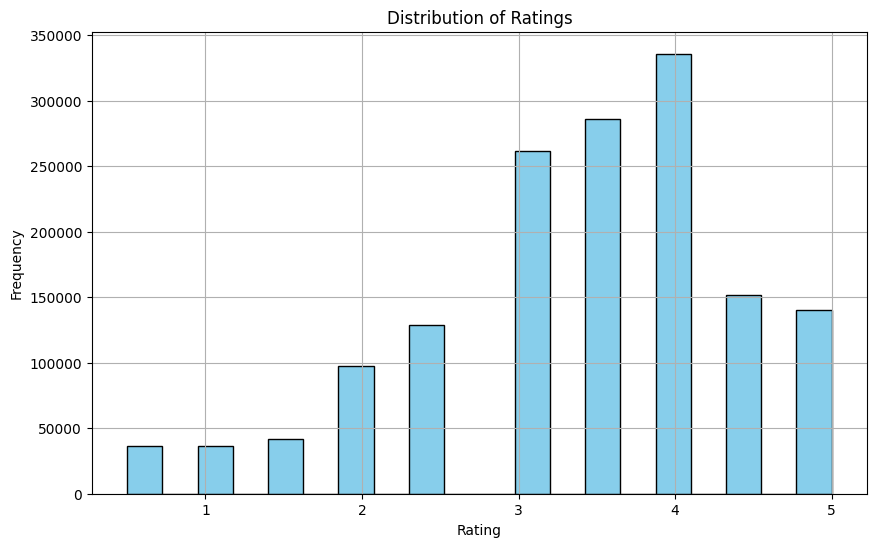

In [50]:
# Distribution of ratings
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

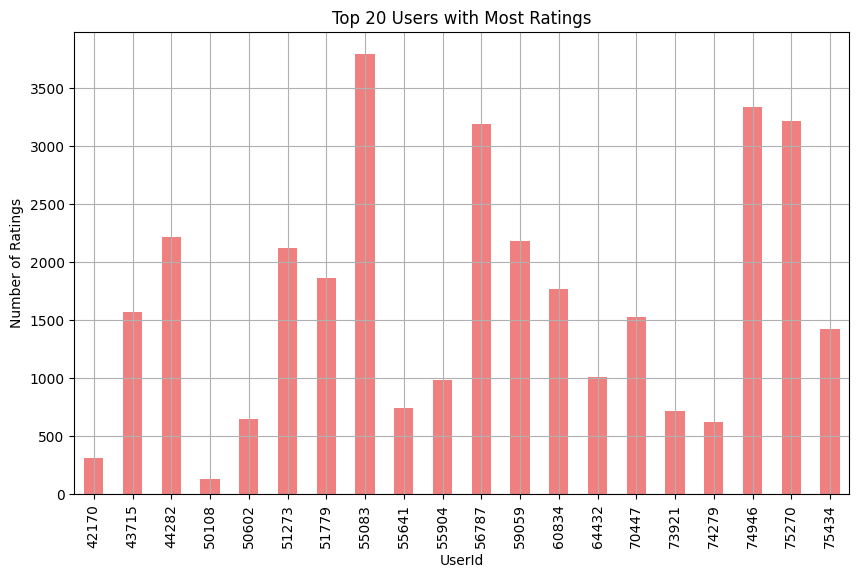

In [51]:
# Number of ratings per user
user_rating_counts = ratings.groupby('userId').size()

plt.figure(figsize=(10,6))
user_rating_counts.head(20).plot(kind='bar', color='lightcoral')
plt.title('Top 20 Users with Most Ratings')
plt.xlabel('UserId')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

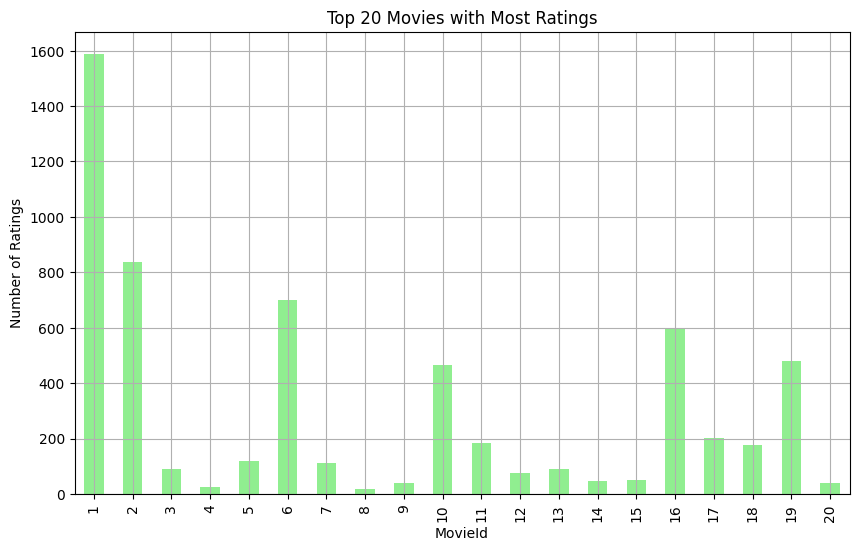

In [52]:
# Number of ratings per movie
movie_rating_counts = ratings.groupby('movieId').size()

plt.figure(figsize=(10,6))
movie_rating_counts.head(20).plot(kind='bar', color='lightgreen')
plt.title('Top 20 Movies with Most Ratings')
plt.xlabel('MovieId')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

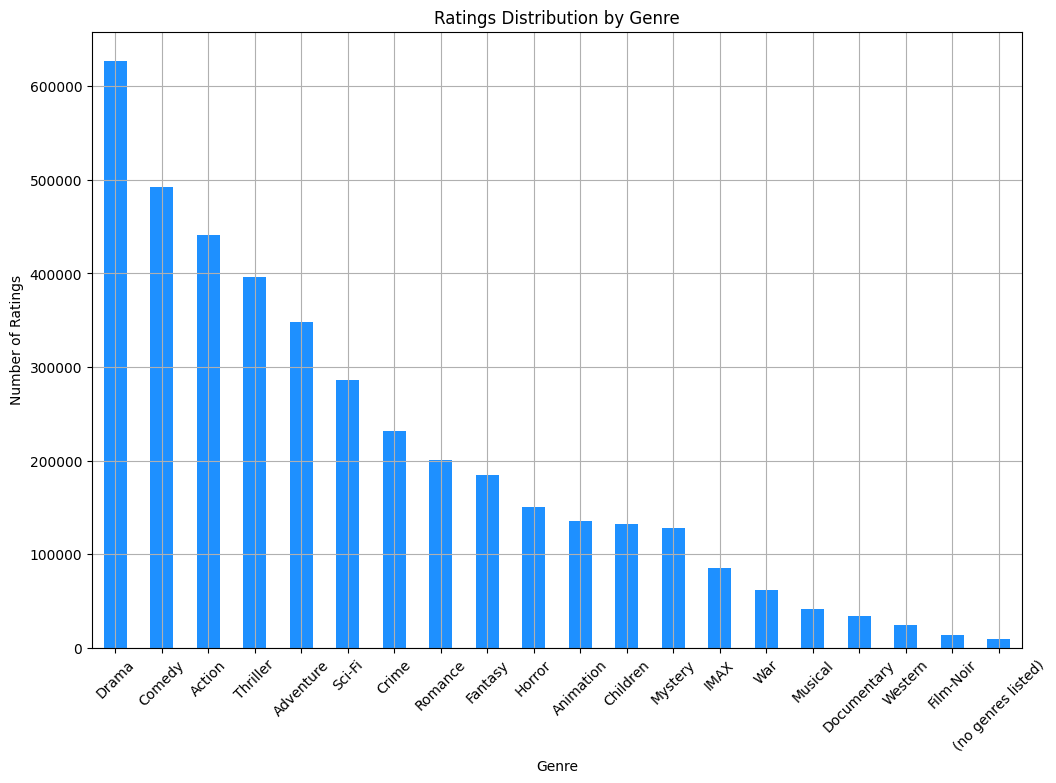

In [53]:
# Flatten genres and count ratings per genre
genre_rating_counts = ratings.join(movies[['movieId', 'genres']].set_index('movieId'), on='movieId')
genre_rating_counts = genre_rating_counts.explode('genres')

genre_counts = genre_rating_counts['genres'].value_counts()

plt.figure(figsize=(12,8))
genre_counts.plot(kind='bar', color='dodgerblue')
plt.title('Ratings Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

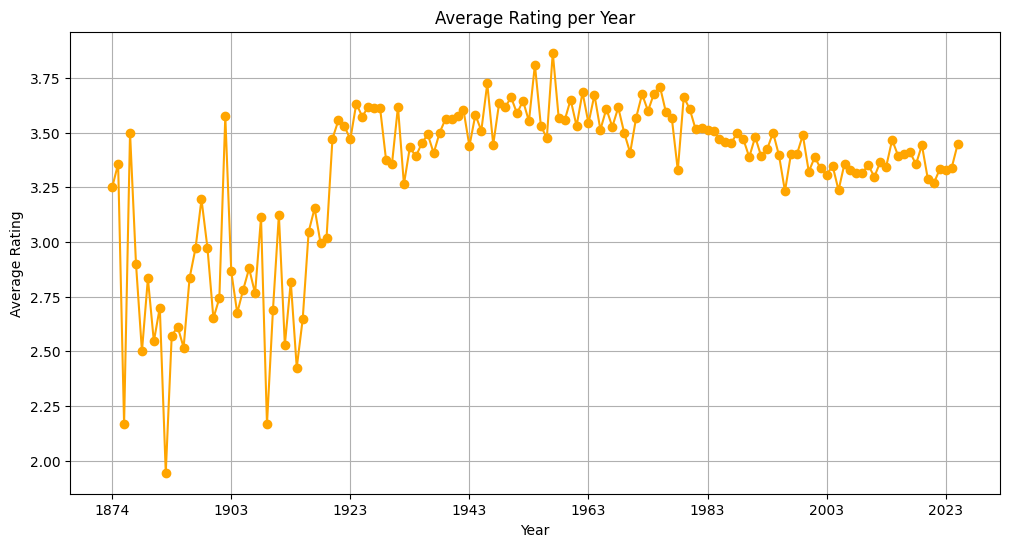

In [54]:
# Average rating per year
ratings_with_year = ratings.join(movies[['movieId', 'year']].set_index('movieId'), on='movieId')
avg_rating_per_year = ratings_with_year.groupby('year')['rating'].mean()

plt.figure(figsize=(12,6))
avg_rating_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

## Conclusions of the  data cleaning

After performing a thorough analysis and cleaning of the **movies** and **ratings** datasets, several crucial steps were taken to ensure the consistency and quality of the data:

1. **Handling Missing Data**:
   - In the **ratings** dataset, rows with missing ratings and timestamps were removed. Additionally, ratings outside the valid range of 0.5 to 5.0 were filtered.
   - For the **movies** dataset, missing years were replaced with "Unknown", and only movies that appeared in the **ratings** dataset were retained for further analysis.


2. **Removing Duplicates**:
   - Duplicate rows in both datasets were identified and eliminated. In the **ratings** dataset, we ensured there were no duplicate entries for the same user and movie by keeping the most recent rating. In the **movies** dataset, duplicate movie titles were addressed by keeping the record with the highest number of genres.


3. **User Engagement Analysis**:
   - Users with fewer than five reviews were removed to avoid skewing the analysis with low-engagement data. Users who had only rated a single movie were identified, and the frequency of their ratings was analyzed, providing insights into their limited activity.


4. **Movies Dataset**:
   - Movie genres were split into lists for easier processing, and unique genres were extracted and displayed.


## Conclusions of the Data Analysis

The analysis of movie and rating data reveals key trends in user rating patterns and movie characteristics:

1. **Rating Distribution**  
User ratings are strongly skewed towards higher values, primarily between 3.0 and 5.0, indicating a tendency for positive ratings. Low ratings are less common, possibly because users may prefer to rate movies they enjoyed or avoid very low scores.

2. **User Activity**  
A small subset of highly active users accounts for a significant portion of the total ratings, with the top 20 users making substantial contributions. This trend is typical in rating platforms, where a few engaged users generate much of the data.

3. **Rating Distribution by Genre**  
Genres such as Drama and Comedy receive the most ratings, while genres like Western and Film-Noir have fewer. This likely reflects user preferences toward popular genres, which also constitute most of the database content.

4. **Rating Evolution Over Time**  
Average ratings by year reveal shifts in user preferences and perceptions over time, possibly reflecting changes in audience tastes or film quality. Recent movies tend to receive higher ratings, potentially due to the availability of popular current films on the platform.